## **AI-Based Personalized Student Recommendations**
This notebook analyzes quiz performance and provides personalized recommendations to students.

In [1]:
!pip install pandas numpy matplotlib requests seaborn scikit-learn

# **Import Libraries**


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# **Data Fetching**

In [3]:
#Fetching Data from API
url = "https://www.jsonkeeper.com/b/LLQT"  # Replace with actual API URL
response = requests.get(url)
data = response.json()  # Parse JSON data
df = pd.DataFrame(data)  # Convert to DataFrame
df.head()

,quiz
id,43
name,None
title,Structural Organisation in Animals and Plants (7)
description,
difficulty_level,None


In [4]:
# Fetch data from Quiz Endpoint
quiz_endpoint = "https://jsonkeeper.com/b/LLQT"
response_quiz = requests.get(quiz_endpoint, verify=False)  # Disable SSL verification

# Check if the request was successful
if response_quiz.status_code == 200:
    quiz_data = response_quiz.json()  # Parse the JSON response
    quiz_df = pd.DataFrame(quiz_data)  # Convert to a DataFrame
    print("Quiz Endpoint Data:")
    print(quiz_df.head())  # Display the first few rows
else:
    print(f"Failed to fetch data from Quiz Endpoint. Status code: {response_quiz.status_code}")

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Quiz Endpoint Data:
                                                               quiz
id                                                               43
name                                                           None
title             Structural Organisation in Animals and Plants (7)
description                                                        
difficulty_level                                               None


In [5]:
# Fetch data from Quiz Submission Data Endpoint
submission_endpoint = "https://api.jsonserve.com/rJvd7g"
response_submission = requests.get(submission_endpoint)

if response_submission.status_code == 200:
    submission_data = response_submission.json()

    # Check if data was fetched correctly
    if isinstance(submission_data, dict):
        # Convert the flat JSON object into a DataFrame with one row
        submission_df = pd.DataFrame([submission_data])

        # If 'response_map' is nested, normalize it into separate columns
        if 'response_map' in submission_data:
            response_map_df = pd.DataFrame.from_dict(submission_data['response_map'], orient='index', columns=['selected_option_id'])
            response_map_df.index.name = 'question_id'
            response_map_df.reset_index(inplace=True)
            print("\nResponse Map Data:")
            print(response_map_df.head())
        else:
            print("\nNo 'response_map' data found.")

        print("\nQuiz Submission Data:")
        print(submission_df.head())
    else:
        print("Unexpected data structure. Expected a dictionary.")
else:
    print(f"Failed to fetch data from Quiz Submission Data. Status code: {response_submission.status_code}")



Response Map Data:
  question_id  selected_option_id
0        1837                7363
1        1848                7407
2        1852                7423
3        1862                7464
4        1877                7525

Quiz Submission Data:
       id  quiz_id                       user_id  \
0  336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at                     created_at  \
0  2025-01-17T15:51:29.859+05:30  2025-01-17T15:51:29.871+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:51:29.871+05:30     32             2     80 %   100  ...   

                        ended_at duration  better_than  total_questions  \
0  2025-01-17T16:21:28.000+05:30    15:00           24              128   

            rank_text mistakes_corrected initial_mistake_count  \
0  Topic Rank - #2402                  6                     8   

                                        response_map  \
0  {'1837': 7363, 

In [6]:
submission_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [7]:
response_map_df.head()

,question_id,selected_option_id
0,1837,7363
1,1848,7407
2,1852,7423
3,1862,7464
4,1877,7525


In [8]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1 non-null      int64 
 1   quiz_id                1 non-null      int64 
 2   user_id                1 non-null      object
 3   submitted_at           1 non-null      object
 4   created_at             1 non-null      object
 5   updated_at             1 non-null      object
 6   score                  1 non-null      int64 
 7   trophy_level           1 non-null      int64 
 8   accuracy               1 non-null      object
 9   speed                  1 non-null      object
 10  final_score            1 non-null      object
 11  negative_score         1 non-null      object
 12  correct_answers        1 non-null      int64 
 13  incorrect_answers      1 non-null      int64 
 14  source                 1 non-null      object
 15  type                   1 no

In [9]:
# Fetch data from API Endpoint
api_endpoint = "https://api.jsonserve.com/XgAgFJ"
response_api = requests.get(api_endpoint)

if response_api.status_code == 200:
    api_data = response_api.json()
    api_df = pd.DataFrame(api_data)
    print("API Endpoint Data:")
    print(api_df.head())
else:
    print(f"Failed to fetch data from API Endpoint. Status code: {response_api.status_code}")


API Endpoint Data:
       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at                     created_at  \
0  2025-01-17T15:30:18.027+05:30  2025-01-17T15:30:18.044+05:30   
1  2025-01-17T15:17:44.042+05:30  2025-01-17T15:17:44.056+05:30   
2  2025-01-16T20:13:19.682+05:30  2025-01-16T20:13:19.699+05:30   
3  2025-01-16T20:00:11.562+05:30  2025-01-16T20:00:11.573+05:30   
4  2025-01-15T20:34:39.462+05:30  2025-01-15T20:34:39.478+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:30:18.044+05:30    108             2     90 %   100  ...   
1  2025-01-17T15:17:44.056+05:30     92             1    100 %   100  ...   
2  2025-01-16T20:13:19.699+05:30  

In [10]:
api_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14 non-null     int64 
 1   quiz_id                14 non-null     int64 
 2   user_id                14 non-null     object
 3   submitted_at           14 non-null     object
 4   created_at             14 non-null     object
 5   updated_at             14 non-null     object
 6   score                  14 non-null     int64 
 7   trophy_level           14 non-null     int64 
 8   accuracy               14 non-null     object
 9   speed                  14 non-null     object
 10  final_score            14 non-null     object
 11  negative_score         14 non-null     object
 12  correct_answers        14 non-null     int64 
 13  incorrect_answers      14 non-null     int64 
 14  source                 14 non-null     object
 15  type                   14

In [12]:
quiz_df

,quiz
id,43
name,None
title,Structural Organisation in Animals and Plants (7)
description,
difficulty_level,None
topic,Structural Organisation in Animals
time,2024-07-03T00:00:00.000+05:30
is_published,True
created_at,2024-07-03T11:00:08.958+05:30
updated_at,2024-09-23T18:43:27.751+05:30


In [13]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [14]:
# Display column names and basic info for each dataset
print("Quiz Data Columns:")
print(quiz_df.columns)

print("\nSubmission Data Columns:")
print(submission_df.columns)

print("\nAPI Data Columns:")
print(api_df.columns)

Quiz Data Columns:
Index(['quiz'], dtype='object')

Submission Data Columns:
Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'next_steps'],
      dtype='object')

API Data Columns:
Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')


In [15]:
quiz_df.to_csv("quiz_data.csv", index=False)
submission_df.to_csv("submission_data.csv", index=False)
api_df.to_csv("api_data.csv", index=False)

# **Data Analysis**



1.   Summary



In [16]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [17]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1 non-null      int64 
 1   quiz_id                1 non-null      int64 
 2   user_id                1 non-null      object
 3   submitted_at           1 non-null      object
 4   created_at             1 non-null      object
 5   updated_at             1 non-null      object
 6   score                  1 non-null      int64 
 7   trophy_level           1 non-null      int64 
 8   accuracy               1 non-null      object
 9   speed                  1 non-null      object
 10  final_score            1 non-null      object
 11  negative_score         1 non-null      object
 12  correct_answers        1 non-null      int64 
 13  incorrect_answers      1 non-null      int64 
 14  source                 1 non-null      object
 15  type                   1 no

In [18]:
# Summary statistics of numeric fields
numeric_columns = ['score', 'correct_answers', 'incorrect_answers', 'mistakes_corrected', 'initial_mistake_count']
print(submission_df[numeric_columns].describe())

       score  correct_answers  incorrect_answers  mistakes_corrected  \
count    1.0              1.0                1.0                 1.0   
mean    32.0              8.0                2.0                 6.0   
std      NaN              NaN                NaN                 NaN   
min     32.0              8.0                2.0                 6.0   
25%     32.0              8.0                2.0                 6.0   
50%     32.0              8.0                2.0                 6.0   
75%     32.0              8.0                2.0                 6.0   
max     32.0              8.0                2.0                 6.0   

       initial_mistake_count  
count                    1.0  
mean                     8.0  
std                      NaN  
min                      8.0  
25%                      8.0  
50%                      8.0  
75%                      8.0  
max                      8.0  


2.   Response Map Insights



In [19]:
# Count total responses
total_responses = len(response_map_df)
print(f"Total responses recorded: {total_responses}")

# Check frequency of selected options
selected_option_counts = response_map_df['selected_option_id'].value_counts()
print("\nMost selected options:")
print(selected_option_counts.head())


Total responses recorded: 10

Most selected options:
selected_option_id
7363    1
7407    1
7423    1
7464    1
7525    1
Name: count, dtype: int64


3.   Overall Accuracy

In [20]:
# Ensure 'accuracy' is numeric
submission_df['accuracy'] = submission_df['accuracy'].str.replace('%', '').astype(float)
overall_accuracy = submission_df['accuracy'].mean()
print(f"Overall accuracy: {overall_accuracy:.2f}%")


Overall accuracy: 80.00%


4. Topic Wise Accuracy

In [21]:
if 'quiz' in submission_df.columns:
    quiz_topic = submission_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) else None)
    submission_df['quiz_topic'] = quiz_topic
    topic_accuracy = submission_df.groupby('quiz_topic')['accuracy'].mean()
    print("\nTopic-Wise Accuracy:")
    print(topic_accuracy)



Topic-Wise Accuracy:
quiz_topic
Structural Organisation in Animals    80.0
Name: accuracy, dtype: float64


5. Trend Analysis



5.1 For Submission_df



In [22]:
# Convert 'submitted_at' to datetime
submission_df['submitted_at'] = pd.to_datetime(submission_df['submitted_at'])


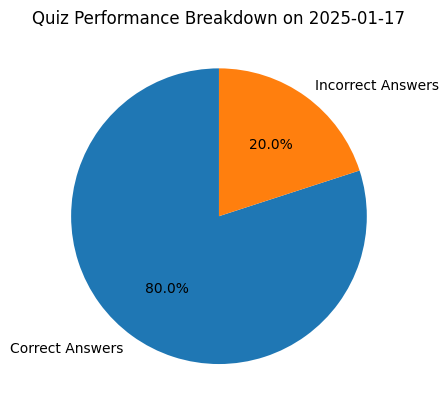

In [23]:
correct_percentage = (submission_df['correct_answers'].sum() / submission_df['total_questions'].sum()) * 100
incorrect_percentage = (submission_df['incorrect_answers'].sum() / submission_df['total_questions'].sum()) * 100
labels = ['Correct Answers', 'Incorrect Answers']
sizes = [correct_percentage, incorrect_percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Quiz Performance Breakdown on ' + str(submission_df['submitted_at'].dt.date.unique()[0]))
plt.show()

In [24]:
response_map_df.head()

,question_id,selected_option_id
0,1837,7363
1,1848,7407
2,1852,7423
3,1862,7464
4,1877,7525


In [25]:
# Response Patterns in response_map --- Analyze how users responded to questions:
# Frequency of responses for each question
response_pattern = response_map_df.groupby('question_id')['selected_option_id'].value_counts().unstack().fillna(0)
print("\n Response Pattern for Questions:")
print(response_pattern.head())



 Response Pattern for Questions:
selected_option_id  7363  7407  7423  7464  7525  7529  7617  7685  7750  7872
question_id                                                                   
1837                 1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1848                 0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1852                 0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1862                 0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
1877                 0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0


In [26]:
response_pattern

selected_option_id,7363,7407,7423,7464,7525,7529,7617,7685,7750,7872
question_id,,,,,,,,,,
1837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1877,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1878,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Group the data by 'question_id' and 'selected_option_id' to calculate the frequency of each option selected for each question
response_pattern = response_map_df.groupby('question_id')['selected_option_id'].value_counts().unstack().fillna(0)

response_pattern_reset = response_pattern.reset_index()
response_table = response_pattern_reset.melt(id_vars='question_id', var_name='Option ID', value_name='Frequency')
response_table_filtered = response_table[response_table['Frequency'] > 0]

final_table = response_table_filtered[['question_id', 'Option ID']]
final_table = final_table.reset_index(drop=True)
final_table


,question_id,Option ID
0,1837,7363
1,1848,7407
2,1852,7423
3,1862,7464
4,1877,7525
5,1878,7529
6,1900,7617
7,1917,7685
8,1934,7750
9,1964,7872


5.2 Trend Analysis for Api_df


Accuracy Trend Over Time (API Data):
submitted_at
2024-12-11    66.000000
2024-12-28    43.000000
2025-01-11    88.500000
2025-01-13    76.666667
2025-01-15    39.666667
2025-01-16    93.000000
2025-01-17    95.000000
Name: accuracy, dtype: float64


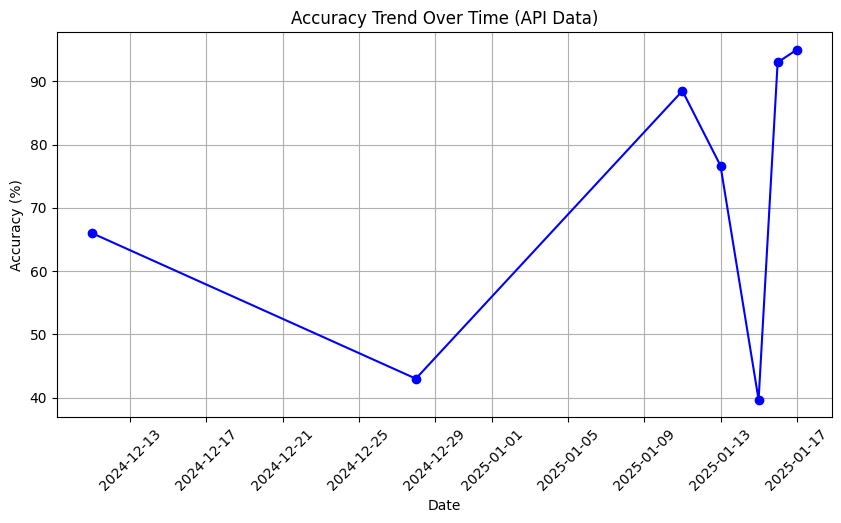

In [28]:
api_df['submitted_at'] = pd.to_datetime(api_df['submitted_at'])

# Convert 'accuracy' to numeric
if api_df['accuracy'].dtype == object:
    api_df['accuracy'] = api_df['accuracy'].str.replace('%', '').astype(float)
else:
    # If not a string, it might already be numeric, just convert to float
    api_df['accuracy'] = api_df['accuracy'].astype(float)

# Analyze accuracy trend over time
api_time_trend = api_df.groupby(api_df['submitted_at'].dt.date)['accuracy'].mean()

# Print accuracy trend
print("\nAccuracy Trend Over Time (API Data):")
print(api_time_trend)

# Plot the trend
plt.figure(figsize=(10, 5))
api_time_trend.plot(kind='line', title='Accuracy Trend Over Time (API Data)', ylabel='Accuracy (%)', xlabel='Date', marker='o', linestyle='-', color='blue')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


6. Weak Areas

In [29]:
submission_df


,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80.0,100,...,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],Structural Organisation in Animals


In [30]:
# Weakest topics
if 'quiz_topic' in submission_df.columns:
    weakest_topics = topic_accuracy.sort_values().head()
    print("\nWeakest Topics:")
    print(weakest_topics)



Weakest Topics:
quiz_topic
Structural Organisation in Animals    80.0
Name: accuracy, dtype: float64


In [31]:
api_df.head(2)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90.0,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100.0,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."


In [32]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   id                     14 non-null     int64                    
 1   quiz_id                14 non-null     int64                    
 2   user_id                14 non-null     object                   
 3   submitted_at           14 non-null     datetime64[ns, UTC+05:30]
 4   created_at             14 non-null     object                   
 5   updated_at             14 non-null     object                   
 6   score                  14 non-null     int64                    
 7   trophy_level           14 non-null     int64                    
 8   accuracy               14 non-null     float64                  
 9   speed                  14 non-null     object                   
 10  final_score            14 non-null     object       

In [33]:
if 'quiz' in api_df.columns and 'accuracy' in api_df.columns:
    # Extract quiz topics from the 'quiz' column, assuming 'topic' is a key within the 'quiz' dictionary
    # If the 'quiz' column contains a dictionary with a 'topic' key, extract the value of that key
    api_df['quiz_topic'] = api_df['quiz'].apply(lambda x: x.get('topic') if isinstance(x, dict) else None)

    # Calculate average accuracy for each topic
    api_topic_accuracy = api_df.groupby('quiz_topic')['accuracy'].mean()

    # Sort topics by accuracy to identify weakest topics
    weakest_topics_api = api_topic_accuracy.sort_values().head()

    print("\nWeakest Topics (API Data):")
    print(weakest_topics_api)
else:
    print("The API data does not contain the required 'quiz' or 'accuracy' columns.")


Weakest Topics (API Data):
quiz_topic
principles of inheritance and variation     30.000000
Human Reproduction                          38.000000
Reproductive Health                         43.000000
Respiration and Gas Exchange                66.000000
Body Fluids and Circulation                 72.333333
Name: accuracy, dtype: float64


7. Error Analysis

In [34]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80.0,100,...,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],Structural Organisation in Animals


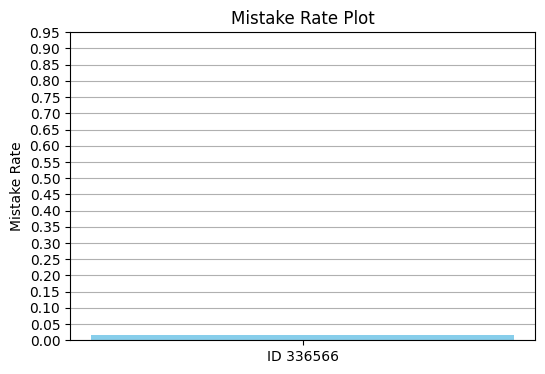

In [35]:
# Mistakes analysis
submission_df['mistake_rate'] = submission_df['incorrect_answers'] / submission_df['total_questions']

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['ID 336566'], submission_df['mistake_rate'], color='skyblue')
plt.title('Mistake Rate Plot')
plt.ylabel('Mistake Rate')
plt.yticks(np.arange(0, 1, 0.05))
plt.grid(axis='y')
plt.show()

In [36]:
api_df.head(2)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90.0,100,...,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",Body Fluids and Circulation
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100.0,100,...,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",Body Fluids and Circulation


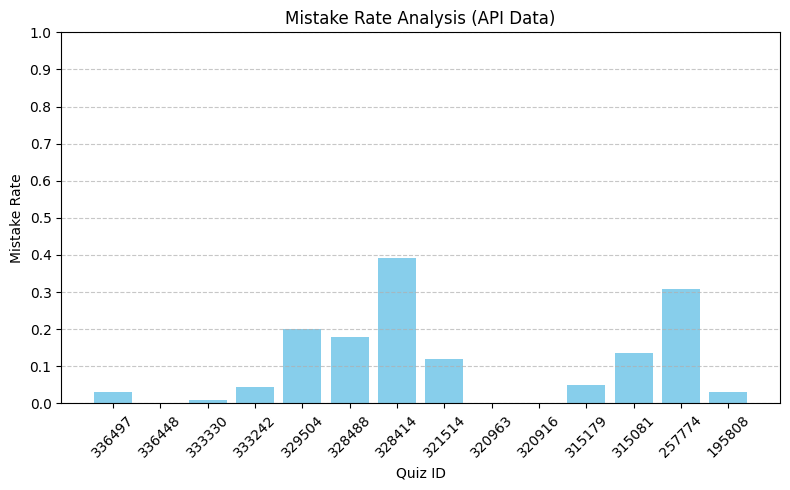

In [37]:
# Ensure the necessary columns exist in the API DataFrame
if 'incorrect_answers' in api_df.columns and 'total_questions' in api_df.columns:
    # Calculate the mistake rate
    api_df['mistake_rate'] = api_df['incorrect_answers'] / api_df['total_questions']

    # Create a bar chart for mistake rates
    plt.figure(figsize=(8, 5))  # Adjusted figure size for better clarity
    plt.bar(api_df['id'].astype(str), api_df['mistake_rate'], color='skyblue')  # Use 'id' as labels
    plt.title('Mistake Rate Analysis (API Data)')
    plt.xlabel('Quiz ID')
    plt.ylabel('Mistake Rate')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.yticks(np.arange(0, 1.05, 0.1))  # Adjust Y-axis ticks
    plt.grid(axis='y', linestyle='--',alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The API data does not contain the required 'incorrect_answers' or 'total_questions' columns.")


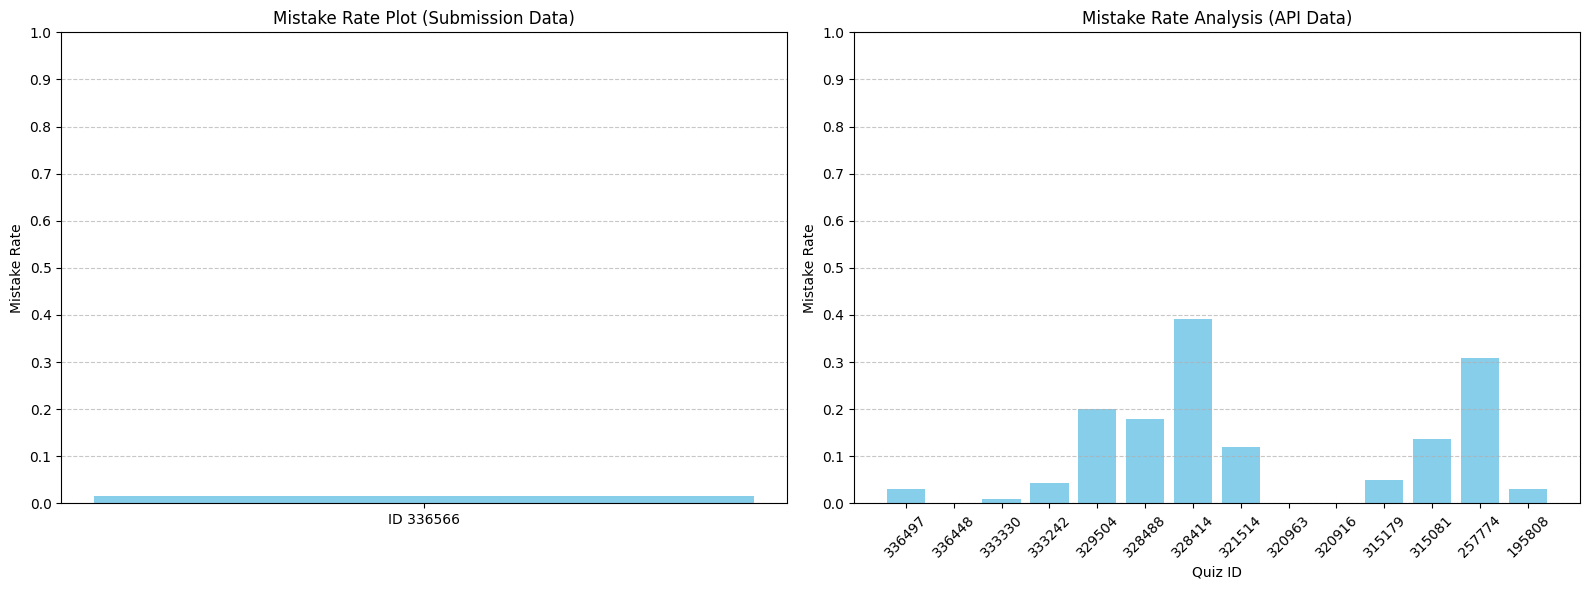

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Mistake Rate for Submission DataFrame
if 'incorrect_answers' in submission_df.columns and 'total_questions' in submission_df.columns:
    submission_df['mistake_rate'] = submission_df['incorrect_answers'] / submission_df['total_questions']

# Mistake Rate for API DataFrame
if 'incorrect_answers' in api_df.columns and 'total_questions' in api_df.columns:
    api_df['mistake_rate'] = api_df['incorrect_answers'] / api_df['total_questions']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot for submission_df
if 'mistake_rate' in submission_df.columns:
    axes[0].bar(['ID 336566'], submission_df['mistake_rate'], color='skyblue')
    axes[0].set_title('Mistake Rate Plot (Submission Data)')
    axes[0].set_ylabel('Mistake Rate')
    axes[0].set_yticks(np.arange(0, 1.05, 0.1))
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for api_df
if 'mistake_rate' in api_df.columns:
    axes[1].bar(api_df['id'].astype(str), api_df['mistake_rate'], color='skyblue')
    axes[1].set_title('Mistake Rate Analysis (API Data)')
    axes[1].set_xlabel('Quiz ID')
    axes[1].set_ylabel('Mistake Rate')
    axes[1].set_xticks(api_df['id'].astype(str))
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_yticks(np.arange(0, 1.05, 0.1))
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

 8. Topic-Wise Accuracy

In [39]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic,mistake_rate
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80.0,100,...,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],Structural Organisation in Animals,0.015625


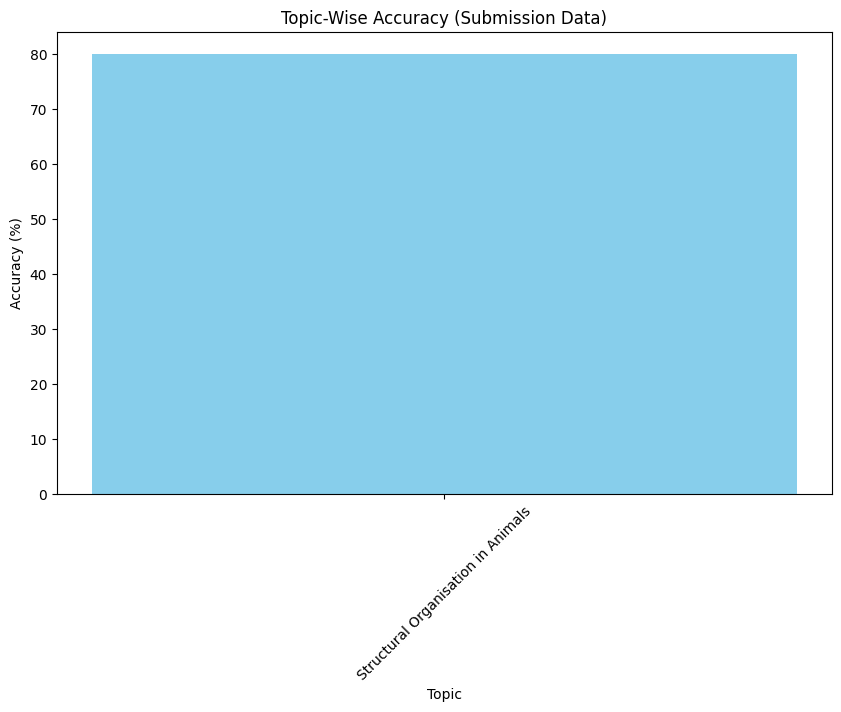

In [40]:
# Extract 'quiz_topic' from nested dictionary if available
if 'quiz' in submission_df.columns:
    submission_df['quiz_topic'] = submission_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) else None)

# Calculate topic-wise accuracy
topic_accuracy = submission_df.groupby('quiz_topic')['accuracy'].mean().reset_index()

# Plot topic-wise accuracy using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(topic_accuracy['quiz_topic'], topic_accuracy['accuracy'], color='skyblue')
plt.title('Topic-Wise Accuracy (Submission Data)')
plt.xlabel('Topic')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

In [41]:
api_df.head(2)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic,mistake_rate
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90.0,100,...,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",Body Fluids and Circulation,0.03
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100.0,100,...,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",Body Fluids and Circulation,0.00


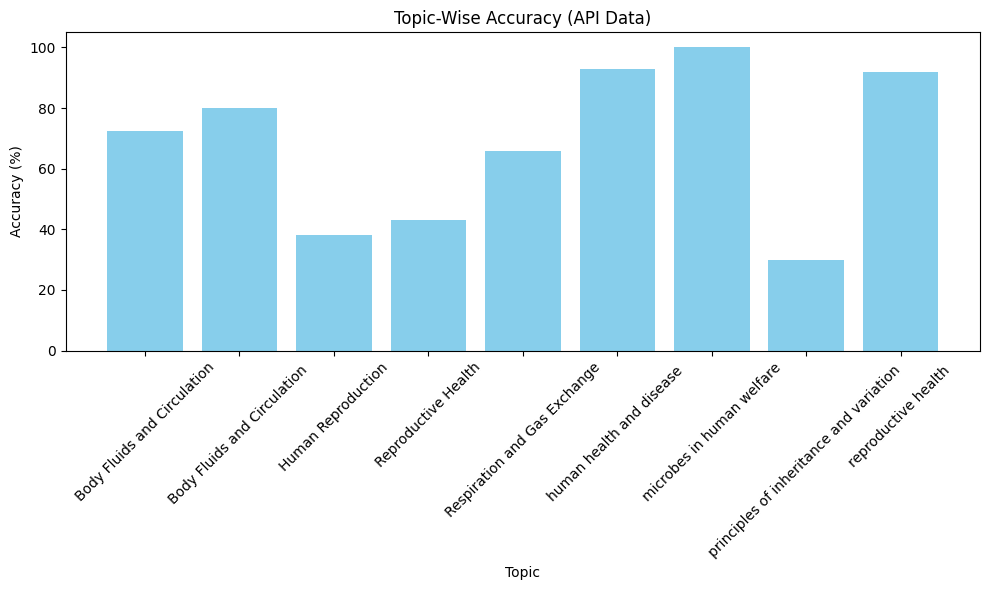

In [42]:
# Extract 'quiz_topic' from nested dictionary if available in API DataFrame
if 'quiz' in api_df.columns:
    api_df['quiz_topic'] = api_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) and 'topic' in x else None)

# Ensure 'quiz_topic' and 'accuracy' columns exist
if 'quiz_topic' in api_df.columns and 'accuracy' in api_df.columns:
    # Calculate topic-wise accuracy
    topic_accuracy = api_df.groupby('quiz_topic')['accuracy'].mean().reset_index()

    # Plot topic-wise accuracy using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(topic_accuracy['quiz_topic'], topic_accuracy['accuracy'], color='skyblue')
    plt.title('Topic-Wise Accuracy (API Data)')
    plt.xlabel('Topic')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()
else:
    print("Required columns 'quiz_topic' and 'accuracy' are not available in the API data.")


9. Difficulty-Level Performance

In [43]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic,mistake_rate
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80.0,100,...,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],Structural Organisation in Animals,0.015625


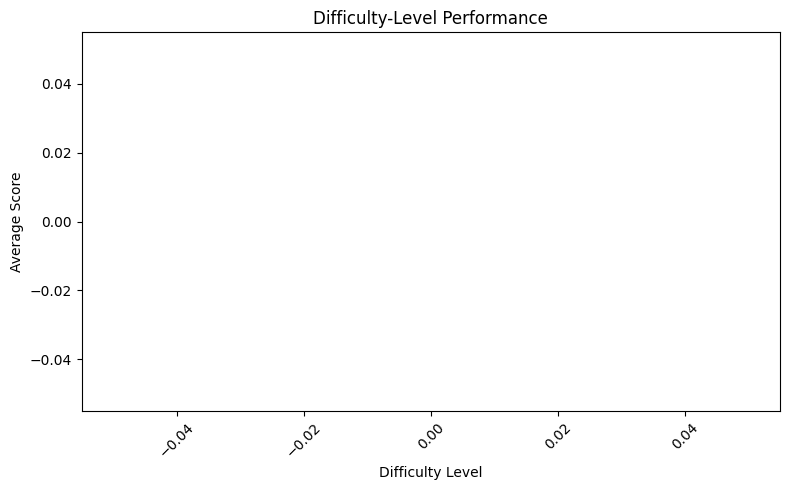

In [44]:
if 'quiz' in submission_df.columns:
    submission_df['difficulty_level'] = submission_df['quiz'].apply(lambda x: x['difficulty_level'] if isinstance(x, dict) else None)

# Calculate performance by difficulty level
difficulty_performance = submission_df.groupby('difficulty_level')['score'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(difficulty_performance['difficulty_level'], difficulty_performance['score'], color='skyblue')
plt.title('Difficulty-Level Performance')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Score')

plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


10. Trend Lines for Scores

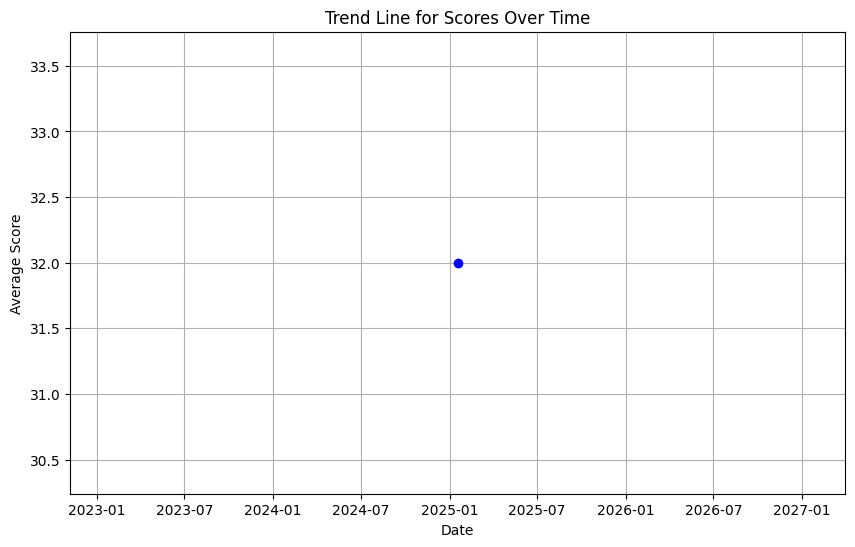

In [45]:
# Convert 'submitted_at' to datetime for trend analysis
submission_df['submitted_at'] = pd.to_datetime(submission_df['submitted_at'])

# Group by date and calculate average scores
score_trend = submission_df.groupby(submission_df['submitted_at'].dt.date)['score'].mean().reset_index()

# Plot trend line for scores using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(score_trend['submitted_at'], score_trend['score'], marker='o', color='blue')
plt.title('Trend Line for Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid()
plt.show()

In [46]:
api_df.head(2)

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,quiz_topic,mistake_rate
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90.0,100,...,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi...",Body Fluids and Circulation,0.03
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100.0,100,...,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio...",Body Fluids and Circulation,0.00


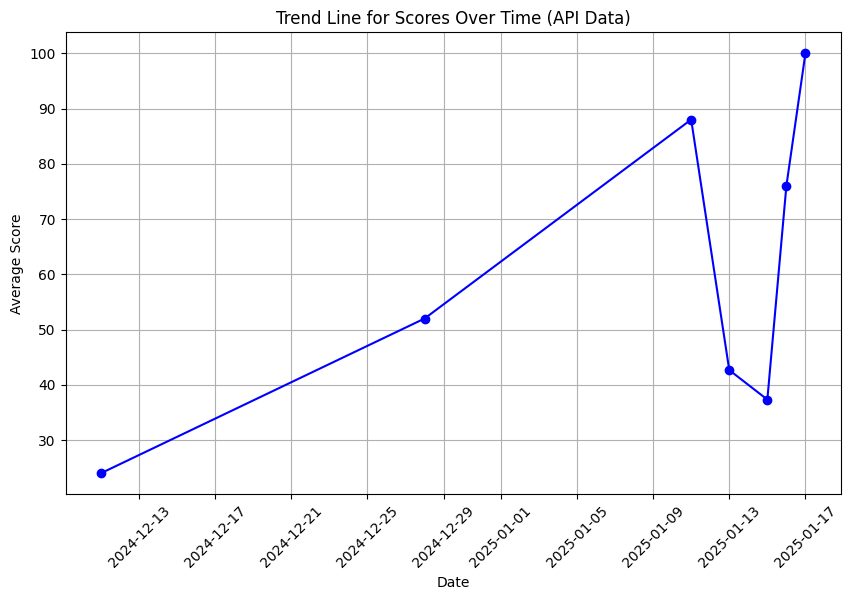

In [47]:
# Convert 'submitted_at' to datetime for trend analysis
api_df['submitted_at'] = pd.to_datetime(api_df['submitted_at'])

# Group by date and calculate average scores
score_trend_api = api_df.groupby(api_df['submitted_at'].dt.date)['score'].mean().reset_index()

# Plot trend line for scores using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(score_trend_api['submitted_at'], score_trend_api['score'], marker='o', color='blue')
plt.title('Trend Line for Scores Over Time (API Data)')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid()
plt.show()


# **Recommendations**

1.   **Low Accuracy**: Suggest revisions for weak topics which need to be revised more.
2.   **High Mistake Rate**: Suggest focusing on specific question types or difficulty levels.
3. **Good Performance**: Encourage the user with advanced-level challenges or a confidence boost

In [48]:
submission_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps,quiz_topic,mistake_rate,difficulty_level
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17 15:51:29.859000+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80.0,100,...,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}],Structural Organisation in Animals,0.015625,None


In [49]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   id                     1 non-null      int64                    
 1   quiz_id                1 non-null      int64                    
 2   user_id                1 non-null      object                   
 3   submitted_at           1 non-null      datetime64[ns, UTC+05:30]
 4   created_at             1 non-null      object                   
 5   updated_at             1 non-null      object                   
 6   score                  1 non-null      int64                    
 7   trophy_level           1 non-null      int64                    
 8   accuracy               1 non-null      float64                  
 9   speed                  1 non-null      object                   
 10  final_score            1 non-null      object         

In [50]:
def check_and_prepare_data(submission_df):
    #Ensures data is in the correct format.
    if submission_df.empty:
        print("The input DataFrame is empty.")
        return None

    print("DataFrame column types:\n", submission_df.dtypes)

    # Ensure 'accuracy' is numeric
    if not pd.api.types.is_numeric_dtype(submission_df['accuracy']):
        print("Converting 'accuracy' column to float.")
        submission_df['accuracy'] = submission_df['accuracy'].str.replace('%', '').astype(float)

    return submission_df

In [51]:
def identify_weak_topics(submission_df):
    # Identifies topics with low accuracy.
    low_accuracy_topics = submission_df[submission_df['accuracy'] < 50]['quiz_topic'].unique()
    if len(low_accuracy_topics) > 0:
        return f"Focus on revising the following topics: {', '.join(low_accuracy_topics)}."
    else:
        return "Your topic-level accuracy is good! Keep up the great work."


In [52]:
def analyze_mistakes(submission_df):
    # Analyzes high mistake rates.
    submission_df['mistake_rate'] = submission_df['incorrect_answers'] / submission_df['total_questions']
    high_mistake_quizzes = submission_df[submission_df['mistake_rate'] > 0.2]  # Mistake rate > 20%

    if not high_mistake_quizzes.empty:
        return f"You made frequent mistakes in quizzes like: {', '.join(high_mistake_quizzes['quiz_topic'].unique())}. Consider revisiting these topics for deeper understanding."
    else:
        return "Your mistake rate is low! You are answering most questions correctly."

In [53]:
def advanced_recommendation(submission_df):
    # Provides advanced recommendations for high achievers.
    high_accuracy = submission_df['accuracy'].mean()
    if high_accuracy >= 80:
        return "Your overall accuracy is outstanding! Challenge yourself with advanced-level quizzes."
    return None

In [54]:
def generate_personalized_recommendations(submission_df):
    submission_df = check_and_prepare_data(submission_df)
    if submission_df is None:
        return ["No data available to generate recommendations."]

In [55]:
recommendations = []
recommendations.append(identify_weak_topics(submission_df))
recommendations.append(analyze_mistakes(submission_df))

advanced_reco = advanced_recommendation(submission_df)
if advanced_reco:
    recommendations.append(advanced_reco)

print("Recommendations for you:")
for rec in recommendations:
    print(f"- {rec}")



Recommendations for you:
- Your topic-level accuracy is good! Keep up the great work.
- Your mistake rate is low! You are answering most questions correctly.
- Your overall accuracy is outstanding! Challenge yourself with advanced-level quizzes.
